In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import bamboolib as blb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df= pd.read_csv("C:/Users/manis/Downloads/letters.csv")

In [3]:
df = df.drop_duplicates(keep='first')
df = df.dropna()
df

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
0,1,0,0,0,0,0,0,0,0,0,...,0,254,0,0,0,0,0,0,0,0
1,0,0,0,0,137,137,192,86,72,1,...,254,0,0,75,254,254,254,17,0,0
2,1,0,0,0,3,141,139,3,0,0,...,0,184,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,94,255,69,0,0,0,0,0
4,0,0,0,0,155,254,254,254,157,30,...,253,0,0,0,223,253,253,253,129,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,2,0,0,1,248,253,176,43,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,128,...,0,0,0,0,255,255,0,0,0,0
41997,2,0,0,0,255,255,191,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,2,0,0,0,255,128,0,0,0,0,...,0,255,0,0,0,0,0,0,0,0


In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

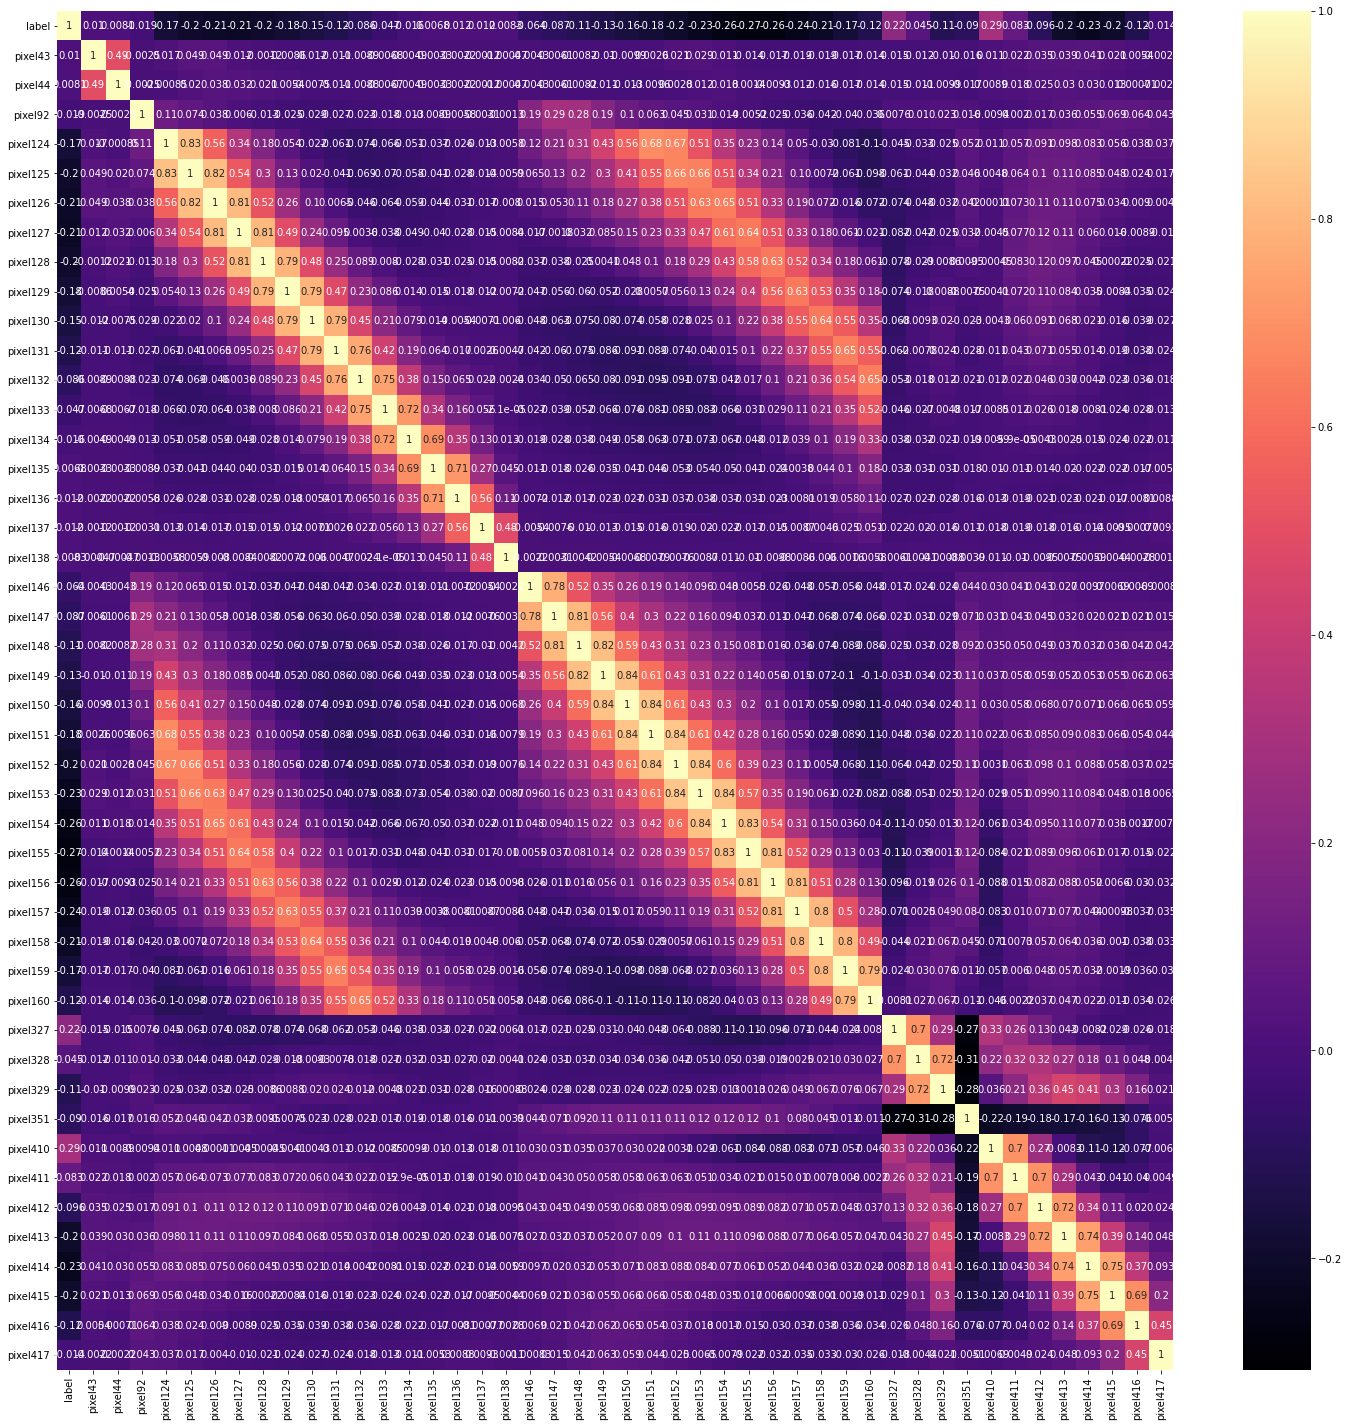

In [5]:
#Plotting Correlation Matrix for dataset
from matplotlib import pyplot as plt
corr = df.corr()
corrMatrix = df.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corrMatrix, annot = True, cmap="magma")
plt.show()

In [6]:
df.dtypes

label       int64
pixel43     int64
pixel44     int64
pixel92     int64
pixel124    int64
pixel125    int64
pixel126    int64
pixel127    int64
pixel128    int64
pixel129    int64
pixel130    int64
pixel131    int64
pixel132    int64
pixel133    int64
pixel134    int64
pixel135    int64
pixel136    int64
pixel137    int64
pixel138    int64
pixel146    int64
pixel147    int64
pixel148    int64
pixel149    int64
pixel150    int64
pixel151    int64
pixel152    int64
pixel153    int64
pixel154    int64
pixel155    int64
pixel156    int64
pixel157    int64
pixel158    int64
pixel159    int64
pixel160    int64
pixel327    int64
pixel328    int64
pixel329    int64
pixel351    int64
pixel410    int64
pixel411    int64
pixel412    int64
pixel413    int64
pixel414    int64
pixel415    int64
pixel416    int64
pixel417    int64
dtype: object

In [7]:
#KNN Model 1  
# Split data into train and test sets
x = df.drop('label', axis=1)
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [8]:
# fitting the KNN model 1 on the training data
knn_model= KNeighborsClassifier(n_neighbors=10)
knn_model.fit(x_train, y_train)

# evaluating the model on the testing data and store the accuracy
y_pred = knn_model.predict(x_test)
accuracy_model= accuracy_score(y_test, y_pred)

In [9]:
#print the accuracy of KNN model 1
print(accuracy_model)

0.6644785731979193


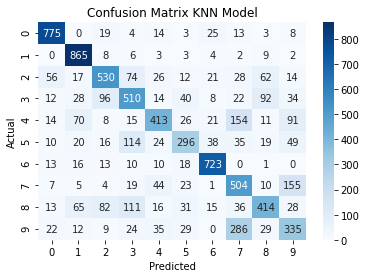

In [10]:
# Generate confusion matrix for model 1
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix KNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
accuracy_model = accuracy_score(y_test, y_pred)
print(accuracy_model)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       864
           1       0.79      0.96      0.86       902
           2       0.68      0.63      0.65       840
           3       0.57      0.60      0.59       856
           4       0.69      0.50      0.58       823
           5       0.62      0.48      0.54       621
           6       0.84      0.90      0.87       804
           7       0.47      0.65      0.54       772
           8       0.64      0.51      0.57       811
           9       0.47      0.43      0.45       781

    accuracy                           0.66      8074
   macro avg       0.66      0.66      0.65      8074
weighted avg       0.66      0.66      0.66      8074

0.6644785731979193


**Random Forest model**

In [12]:
#Random forest model 
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Create a Random Forest Classifier object
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [14]:
# Make predictions on the testing data
y_pred = rf.predict(x_test)

In [15]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6940797621996532


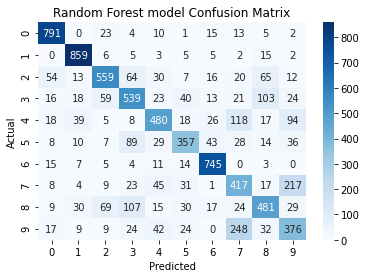

In [16]:
# Generate confusion matrix for model 1
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
# Calculate accuracy, precision, recall
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.6940797621996532
Precision: 0.6931594773276447
Recall: 0.6940797621996532


In [18]:
# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
accuracy_model = accuracy_score(y_test, y_pred)
print(accuracy_model)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       864
           1       0.87      0.95      0.91       902
           2       0.74      0.67      0.70       840
           3       0.62      0.63      0.63       856
           4       0.70      0.58      0.64       823
           5       0.68      0.57      0.62       621
           6       0.85      0.93      0.88       804
           7       0.47      0.54      0.50       772
           8       0.64      0.59      0.62       811
           9       0.47      0.48      0.48       781

    accuracy                           0.69      8074
   macro avg       0.69      0.69      0.69      8074
weighted avg       0.69      0.69      0.69      8074

0.6940797621996532


[0.0001250206659390166, 0.0001500160073717274, 0.0019266351751480073, 0.014096192667154695, 0.01550592557461226, 0.015348820117347443, 0.01674383835584847, 0.016525075756907214, 0.013616723546938252, 0.012907461847084684, 0.009229148671362868, 0.0067371432255898655, 0.005482015877270841, 0.0039809403186102646, 0.0023769002677653285, 0.001068312744359925, 0.0003216001233635279, 3.2496966012181314e-05, 0.0026932113158856007, 0.00553156527600286, 0.00935298742564864, 0.015518902780957973, 0.019777206631923193, 0.02405235138285776, 0.026549542721355, 0.02692769777764581, 0.02995054037271624, 0.03425438724750002, 0.034422895268581215, 0.03094666679055183, 0.029613173708507263, 0.02437807045027581, 0.027061606349428047, 0.0736247205979745, 0.047466626484389075, 0.03981027032796631, 0.10686262404129022, 0.09193233055232712, 0.05304384805837446, 0.038503228147814206, 0.028725067178109933, 0.02278681358117405, 0.013496329215816592, 0.0053820729743738775, 0.0011609954318657744]


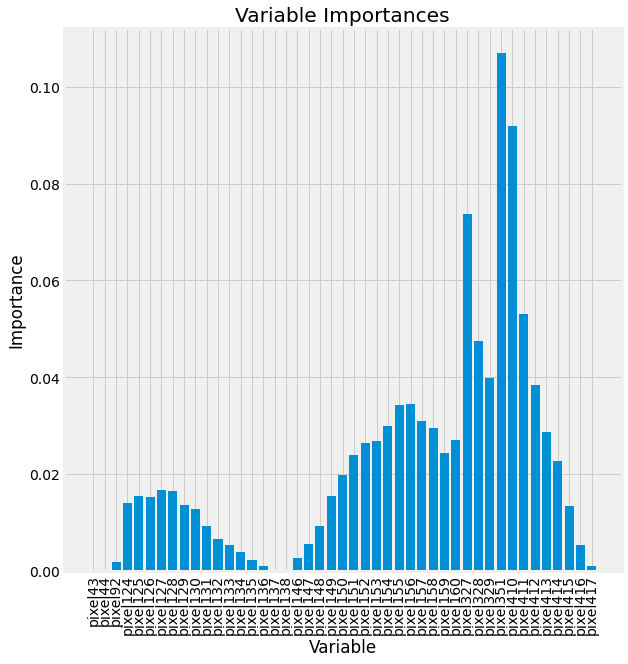

In [19]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
print(importances)

# Import matplotlib for plotting 
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(10, 10))

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))


# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, x.columns, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

**Neural Network**

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [32]:
#KNN Model 1  
# Split data into train and test sets
x = df.drop('label', axis=1)
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.preprocessing import StandardScaler

unscaled_features=x_train
sc=StandardScaler()
x_train_array=sc.fit_transform(x_train.values)

#assign scaled data to dataframe
x_train= pd.DataFrame(x_train_array, index=x_train.index, columns=x_train.columns)
x_test_array=sc.transform(x_test.values)
x_test= pd.DataFrame(x_test_array, index=x_test.index, columns=x_test.columns)


In [34]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='sgd', random_state=1, max_iter=1000).fit(x_train, y_train)
clf.score(x_test,y_test)

0.6958137230616794

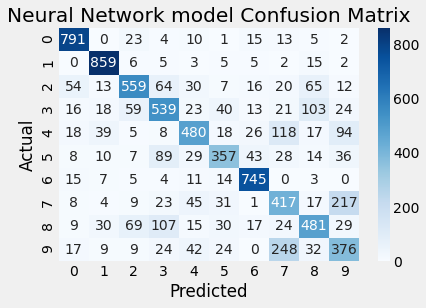

In [35]:
# Generate confusion matrix 
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Neural Network model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
# Evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
accuracy_model = accuracy_score(y_test, y_pred)
print(accuracy_model)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       864
           1       0.87      0.95      0.91       902
           2       0.74      0.67      0.70       840
           3       0.62      0.63      0.63       856
           4       0.70      0.58      0.64       823
           5       0.68      0.57      0.62       621
           6       0.85      0.93      0.88       804
           7       0.47      0.54      0.50       772
           8       0.64      0.59      0.62       811
           9       0.47      0.48      0.48       781

    accuracy                           0.69      8074
   macro avg       0.69      0.69      0.69      8074
weighted avg       0.69      0.69      0.69      8074

0.6940797621996532


Confusion matrix:
 [[791   0  23   4  10   1  15  13   5   2]
 [  0 859   6   5   3   5   5   2  15   2]
 [ 54  13 559  64  30   7  16  20  65  12]
 [ 16  18  59 539  23  40  13  21 103  24]
 [ 18  39   5   8 480  18  26 118  17  94]
 [  8  10   7  89  29 357  43  28  14  36]
 [ 15   7   5   4  11  14 745   0   3   0]
 [  8   4   9  23  45  31   1 417  17 217]
 [  9  30  69 107  15  30  17  24 481  29]
 [ 17   9   9  24  42  24   0 248  32 376]]


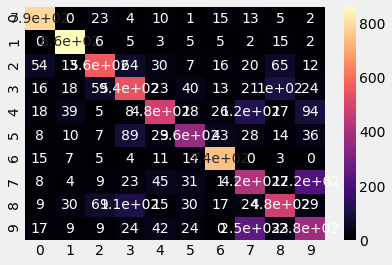

In [37]:
#creating a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

print("Confusion matrix:\n", confusion)

sns.heatmap(confusion, annot = True, cmap="magma")
plt.show()